In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('metadata.csv', index_col=0)
df

cellnames cellids grouping  time_continuous  time_discrete
C1           C1      C1       M2         0.585587              8
C10          C2     C10       M2         0.617431              8
C100         C3    C100       M2         0.579871              8
C1000        C4   C1000       M3         0.460949              6
C1001        C5   C1001       M4         0.761093             10
...         ...     ...      ...              ...            ...
C995      C2440    C995       M1         0.010887              1
C996      C2441    C996       M3         0.532023              7
C997      C2442    C997       M3         0.323701              4
C998      C2443    C998       M3         0.323701              4
C999      C2444    C999       M1         0.000000              1

[2399 rows x 5 columns]

In [3]:
# c = df['U']
g = df['grouping'].tolist()
set(g)

{'M1', 'M2', 'M3', 'M4'}

In [6]:
# types = ['M1', 'M2', 'M3', 'M4']
types = list(set(g))
types

['M1', 'M2', 'M3', 'M4']

In [7]:
cellnames = df['cellnames'].tolist()
cellids = df['cellids'].tolist()

In [8]:
labels = [types.index(g[cellids.index(name)])+1 for name in cellnames]

In [9]:
pd.DataFrame(labels).to_csv('labels.csv', header=False, index=False)

In [10]:
data_df = pd.read_csv('data.csv', header='infer', index_col=0)
data_df

G1        G2        G3        G4        G5        G6        G7  \
C1     6.356311  0.000000  3.729231  0.000000  0.000000  4.806143  0.000000   
C2     5.356065  0.000000  0.000000  6.351980  0.000000  4.633488  0.000000   
C3     6.541855  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C4     0.000000  5.081731  0.000000  0.000000  0.000000  0.000000  0.000000   
C5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  5.962864   
...         ...       ...       ...       ...       ...       ...       ...   
C2440  0.000000  0.000000  0.000000  0.000000  0.000000  4.304818  0.000000   
C2441  0.000000  0.000000  4.937399  5.367426  0.000000  0.000000  0.000000   
C2442  0.000000  0.000000  0.000000  0.000000  3.428444  0.000000  0.000000   
C2443  0.000000  6.074783  4.984062  0.000000  0.000000  0.000000  0.000000   
C2444  0.000000  3.715979  0.000000  0.000000  0.000000  0.000000  0.000000   

             G8        G9       G10  ...      G475      G476      G477  \
C1     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
C2     0.000000  0.000000  5.460462  ...  4.390866  5.382881  0.000000   
C3     2.458458  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
C4     7.308148  0.000000  7.218135  ...  0.000000  0.000000  0.000000   
C5     4.223725  6.226053  0.000000  ...  0.000000  5.225278  5.377436   
...         ...       ...       ...  ...       ...       ...       ...   
C2440  0.000000  7.545085  0.000000  ...  6.249005  0.000000  6.448163   
C2441  6.662831  0.000000  6.662831  ...  5.040947  0.000000  0.000000   
C2442  7.256628  0.000000  6.325803  ...  0.000000  0.000000  0.000000   
C2443  7.556859  0.000000  5.999990  ...  0.000000  0.000000  0.000000   
C2444  0.000000  6.695503  0.000000  ...  6.227825  5.631195  0.000000   

           G478      G479      G480      G481      G482      G483      G484  
C1     0.000000  6.440193  0.000000  0.000000  0.000000  0.000000  0.000000  
C2     5.557811  5.243520  0.000000  0.000000  0.000000  0.000000  0.000000  
C3     0.000000  6.506618  0.000000  0.000000  0.000000  0.000000  0.000000  
C4     0.000000  3.204187  0.000000  0.000000  0.000000  4.334236  6.875258  
C5     0.000000  3.049912  5.640703  0.000000  6.448556  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
C2440  5.195819  0.000000  0.000000  0.000000  7.573787  6.352018  4.304818  
C2441  0.000000  0.000000  4.618293  5.760277  0.000000  0.000000  5.655407  
C2442  4.636512  0.000000  0.000000  4.868569  0.000000  0.000000  5.607215  
C2443  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  6.110773  
C2444  0.000000  0.000000  5.565466  0.000000  6.290194  6.310398  0.000000  

[2399 rows x 484 columns]

In [11]:
data = np.array(data_df)

In [12]:
from sklearn.decomposition import PCA
data = PCA(n_components=30).fit_transform(data)

In [13]:
data.shape

(2399, 30)

In [14]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(data)

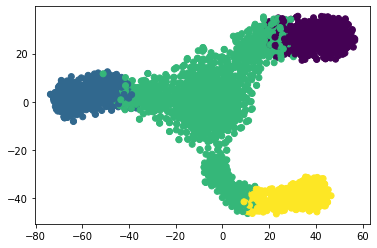

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)